<h1>Product And Retail Data Analysis</h1>

#### About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

<h4>Importing Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2>Loading dataset</h2>

In [2]:
df = pd.read_csv("ecommercedata.csv",encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<p>Minimum quantity is -80995 and minimum price is -11062 its look strange we need to clean our data set first then do analysis</p>

<h2>Data Cleaning and Preprocessing</h2>

In [7]:
#Checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Changing date data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<h5>Droping missing values</h5>

In [10]:
df2 = df.dropna()

In [11]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<h5>Removing negative values</h5>

In [13]:
df2 = df2[df2['Quantity']>0]

In [14]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
# Checking rows where Quantity is 80995
df2[df2['Quantity']==80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [16]:
# Changing Customer data type
df2['CustomerID'] = df2['CustomerID'].astype('int64')

In [17]:
df2.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

<h3>Calculating Total Sales</h3>

In [18]:
df2['Total_Sales'] = df2['Quantity']*df2['UnitPrice']

In [19]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<h3>Creating New Columns</h3>

<li>Year</li>
<li>Month</li>
<li>Day</li>
<li>Dayofweek</li>
<li>Dayofyear</li>
<li>weekofyear</li>
<li>Quater</li>

In [20]:
# Starting with Month_Year First
df2['month_year'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [21]:
df2['Year'] = df2['InvoiceDate'].apply(lambda x : x.year)
df2['Month'] = df2['InvoiceDate'].apply(lambda x : x.month)
df2['Day'] = df2['InvoiceDate'].apply(lambda x : x.day)

In [22]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1


In [23]:
L = ['dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

C:\Users\Fattani\AppData\Local\Temp/ipykernel_6892/3678553925.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [24]:
df2['dayofweek'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [25]:
# +1 to make Monday=1.....until Sunday=7
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [26]:
df2['DayName'] = df['InvoiceDate'].dt.day_name()

In [27]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter,DayName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday


<h2>Exploratory Data Analysis</h2>

<h5>Number of sales per customer for each country</h5>

In [28]:
sal_per_cus = df2.groupby(by=['CustomerID', 'Country'],as_index = False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False)
sal_per_cus.columns = ['CustomerID', 'Country', "NumberOfSales"]
sal_per_cus.head(10)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


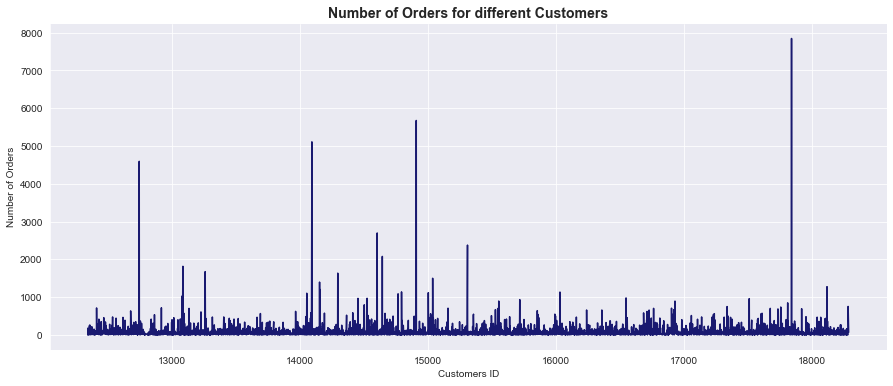

In [29]:
orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
sns.set_style('darkgrid')
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo,color='midnightblue')
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
sns.despine()
plt.title('Number of Orders for different Customers',fontsize=14,weight='bold')
plt.show()

<h5>Number of sales generate from each customer</h5>

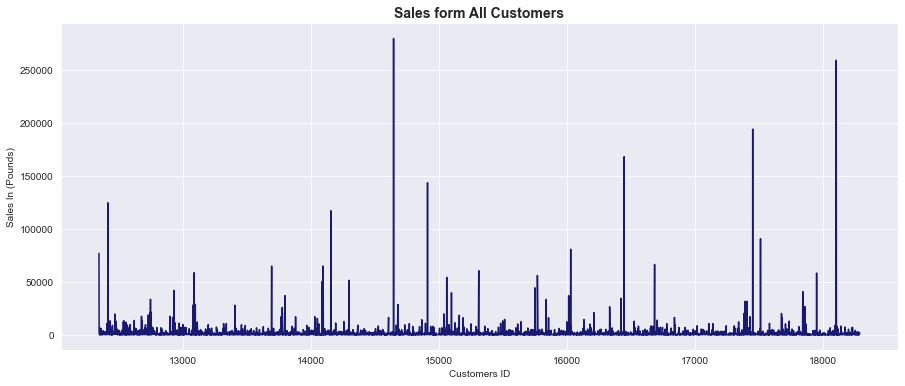

In [30]:
sal = df2.groupby(by=['CustomerID','Country'], as_index=False)['Total_Sales'].sum()
sns.set_style('darkgrid')
plt.subplots(figsize=(15,6))
plt.plot(sal.CustomerID, sal.Total_Sales,color='midnightblue')
plt.xlabel('Customers ID')
plt.ylabel('Sales In (Pounds)')
sns.despine()
plt.title('Sales form All Customers',fontsize=14,weight='bold')
plt.show()

<h5>Revenue Generate by customer for each country</h5>

In [31]:
rev_per_cus = df2.groupby(by=['CustomerID', 'Country'],as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False)
rev_per_cus.columns = ['CustomerID', 'Country', "Revenue"]
rev_per_cus.head(10)

,CustomerID,Country,Revenue
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


In [32]:
df2['Hour'] = df2['InvoiceDate'].apply(lambda x : x.hour)

In [33]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter,DayName,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8


<h5>Number of order By Month</h5>


In [34]:
mon = df2['month_year'].value_counts().reset_index()

In [35]:
mon = mon.sort_values(by='index',ascending=True)

In [36]:
mon.head(13)

,index,month_year
8,2010-12,26160
10,2011-01,21232
11,2011-02,19928
5,2011-03,27177
9,2011-04,22644
3,2011-05,28322
4,2011-06,27185
7,2011-07,26827
6,2011-08,27013
2,2011-09,40030


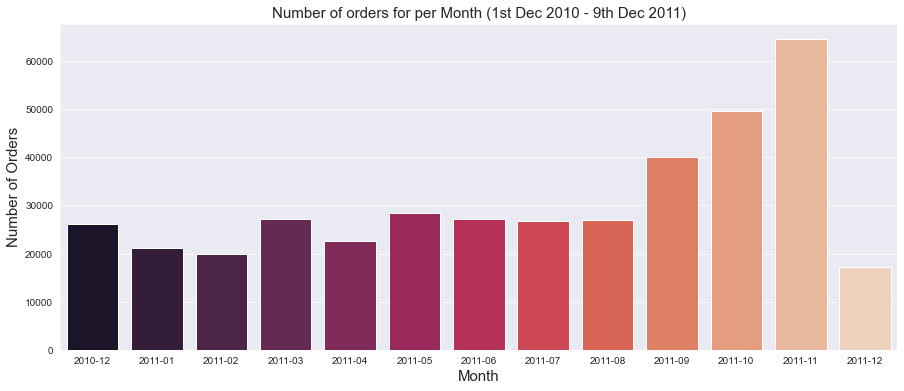

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x=mon['index'],y=mon['month_year'],palette='rocket')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
plt.show()

<h5>Number of orders per day of the week</h5>

In [38]:
day = df2.groupby('InvoiceNo')['DayName'].unique().value_counts().sort_index()

Text(0.5, 1.0, 'Number of orders for different Days')

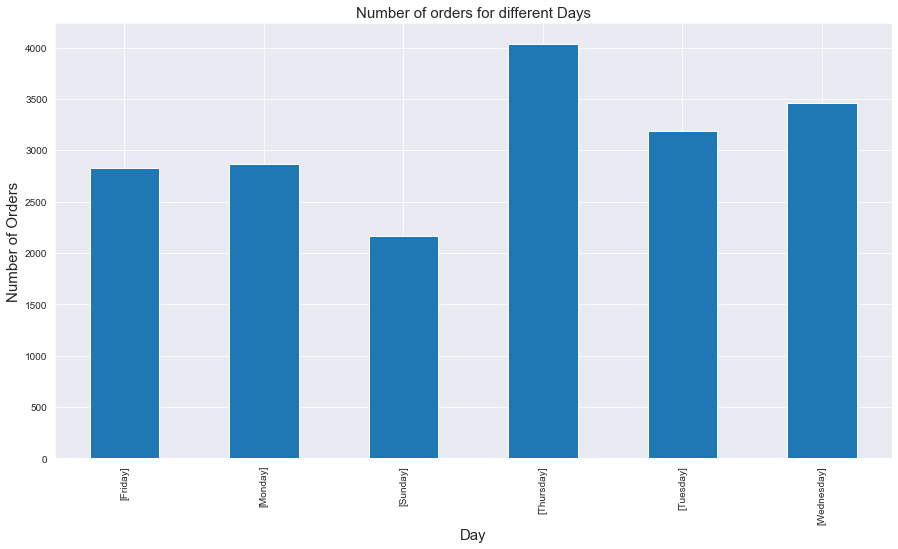

In [39]:
plt.figure(figsize=(15,8))
day.plot(kind='bar')
plt.xlabel('Day',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders for different Days',fontsize=15)

<h5>Number of sales per week of the year</h5>

In [40]:
week = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().sort_index()

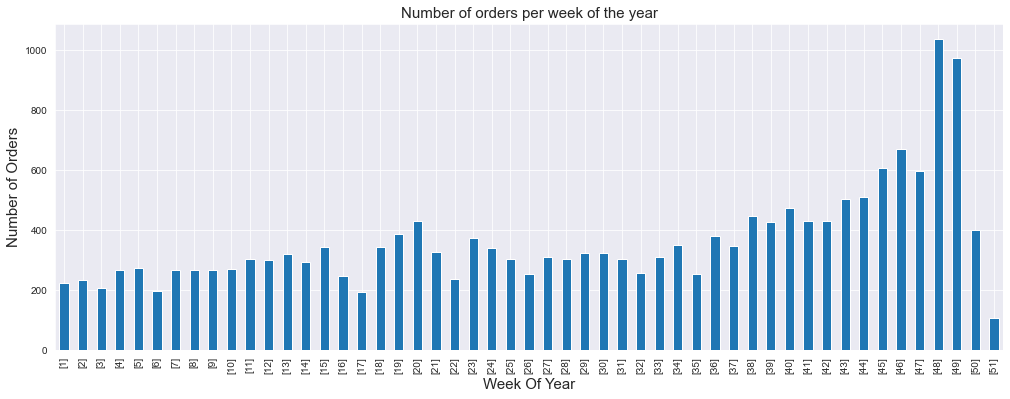

In [41]:
plt.figure(figsize=(17,6))
week.plot(kind='bar')
plt.xlabel('Week Of Year',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)
plt.title('Number of orders per week of the year',fontsize=15)
plt.show()

<h5>What are the free items</h5>

In [42]:
df_free = df2[df2['UnitPrice']==0]

In [43]:
df_free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter,DayName,Hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4,Sunday,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4,Thursday,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4,Tuesday,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1,Thursday,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1,Thursday,16


<h5> See when these free items were given out</h5>

In [44]:
free = df_free['month_year'].value_counts().reset_index()

In [45]:
free

,index,month_year
0,2011-11,14
1,2011-08,6
2,2010-12,3
3,2011-01,3
4,2011-10,3
5,2011-03,2
6,2011-04,2
7,2011-05,2
8,2011-07,2
9,2011-09,2


In [46]:
free = free.sort_values(by='index',ascending=True)

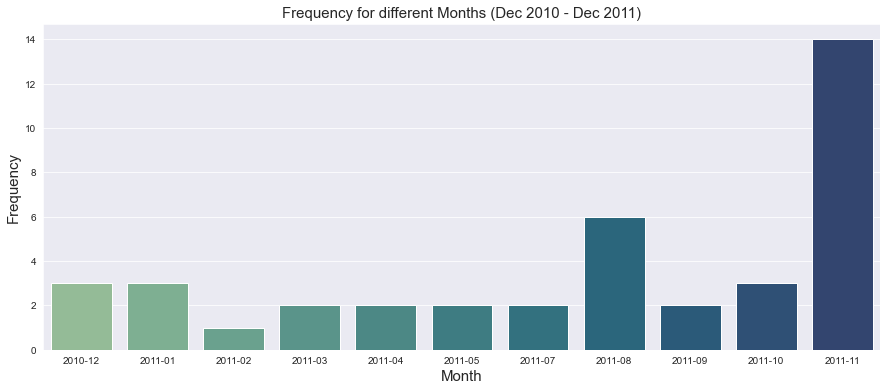

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x=free['index'],y=free['month_year'],palette='crest')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
plt.show()

### Analysis per Country

<h5>Numbers of orders by country</h5>

In [48]:
group_country = df2.groupby('Country')['InvoiceDate'].count().sort_values()


In [49]:
group_country

Country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


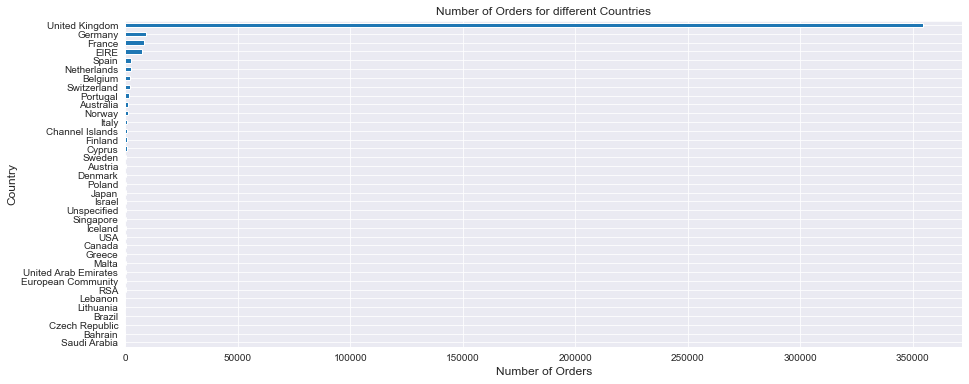

In [50]:
plt.figure(figsize=(15,6))
group_country.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<h6>Now lets remove Uk to understand the performance of other country</h5>

In [51]:
group_country_orders_without_uk = group_country.copy()
del group_country_orders_without_uk['United Kingdom']

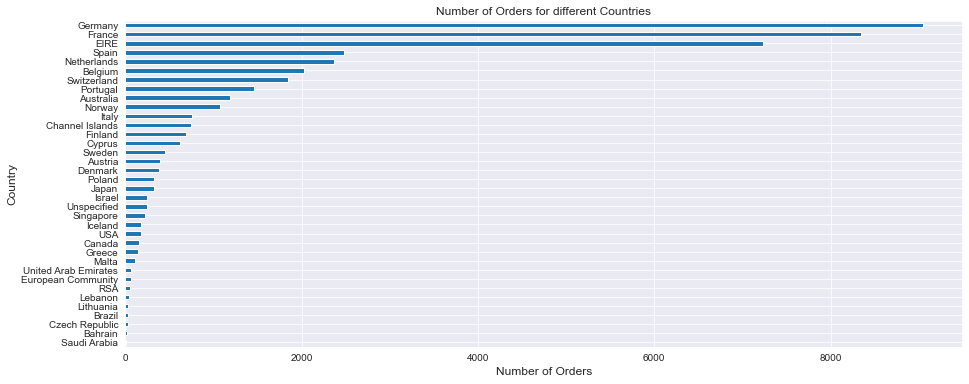

In [52]:
plt.figure(figsize=(15,6))
group_country_orders_without_uk.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<h5>Revenue Genetated By Countries</h5>

In [53]:
group_country_amount_spent = df2.groupby('Country')['Total_Sales'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

In [54]:
group_country_amount_spent

Country
Saudi Arabia               145.92
Bahrain                    548.40
Czech Republic             826.74
RSA                       1002.31
Brazil                    1143.60
European Community        1300.25
Lithuania                 1661.06
Lebanon                   1693.88
United Arab Emirates      1902.28
Unspecified               2667.07
Malta                     2725.59
USA                       3580.39
Canada                    3666.38
Iceland                   4310.00
Greece                    4760.52
Israel                    7221.69
Poland                    7334.65
Austria                  10198.68
Cyprus                   13590.38
Italy                    17483.24
Denmark                  18955.34
Channel Islands          20450.44
Singapore                21279.29
Finland                  22546.08
Portugal                 33439.89
Norway                   36165.44
Japan                    37416.37
Sweden                   38378.33
Belgium                  41196.34
Switze

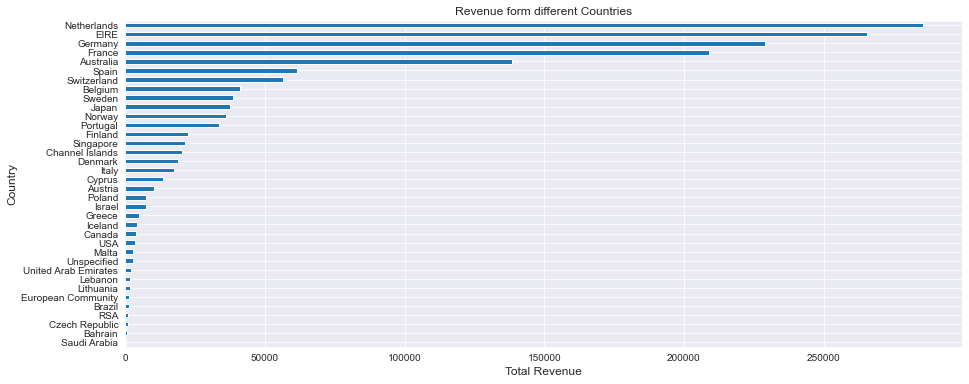

In [55]:
plt.figure(figsize=(15,6))
group_country_amount_spent.plot(kind='barh')
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Revenue form different Countries', fontsize=12)
plt.show()

## Repeat Customers

In [56]:
# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df3 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

<h5>total amount spent per invoice and associate it with CustomerID and Country</h5>

In [57]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,month_year,Year,Month,Day,dayofweek,dayofyear,weekofyear,quarter,DayName,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4,Wednesday,8


In [58]:
invoice_cus_df = df3.groupby(by = ['InvoiceNo','InvoiceDate']).agg({"Total_Sales": sum, "CustomerID":max, "Country":max}).reset_index()

In [59]:
invoice_cus_df.head()

,InvoiceNo,InvoiceDate,Total_Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [60]:
invoice_cus_df.sort_values(by='Total_Sales',ascending=False).head(10)

,InvoiceNo,InvoiceDate,Total_Sales,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [61]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_cus_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

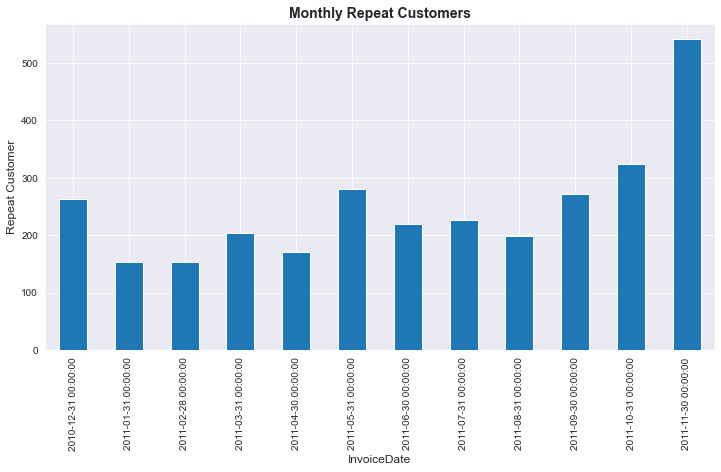

In [62]:
plt.figure(figsize=(12,6))
plt.title('Monthly Repeat Customers',fontsize=14,weight='bold')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Repeat Customer',fontsize=12)
monthly_repeat_customers_df.plot(kind='bar')
plt.show()

In [63]:
# Number of Unique customers per month
monthly_unique_customers_df = df3.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

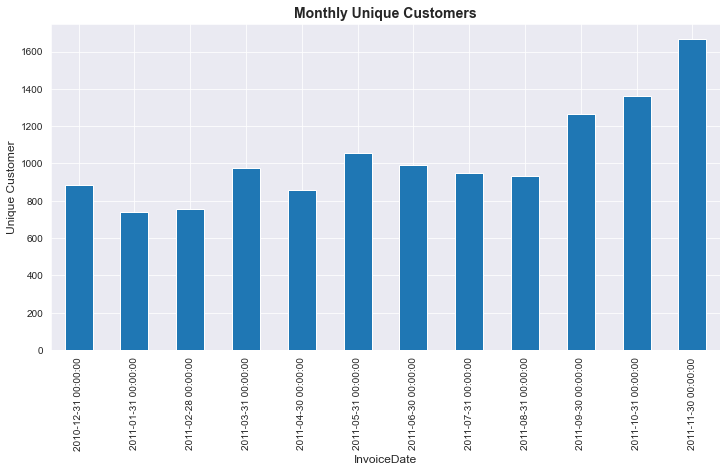

In [64]:
plt.figure(figsize=(12,6))
plt.title('Monthly Unique Customers',fontsize=14,weight='bold')
plt.xlabel('Months',fontsize=12)
plt.ylabel('Unique Customer',fontsize=12)
monthly_unique_customers_df.plot(kind='bar')
plt.show()

# Item Trends

Let's count the number of items sold for each product for each period.

In [65]:
# Now let's get quantity of each item sold per month
date_item_df = df3.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [66]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678
2385,2011-11-30,84879,5190
1135,2011-11-30,22578,4981
2498,2011-11-30,85123A,4861
1134,2011-11-30,22577,4582
2278,2011-11-30,84077,4500


In [67]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [68]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


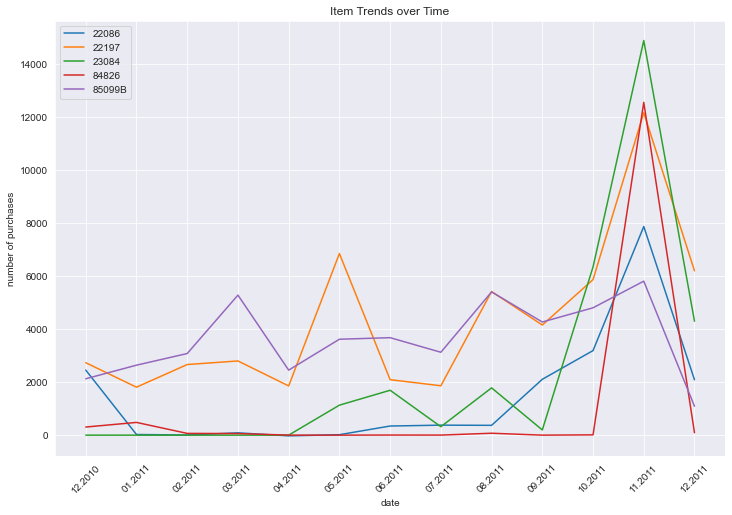

In [69]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()